In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import cgs as cgs
from scipy import interpolate
import dwarf_model as dw_model
from initial_conditions import ic_list as icl ;
from matplotlib import rc

using cgs py
Loading IC for  Leo_T_burkert
Loading IC for  Leo_T
MUST SET A 'potential_type'
Loading IC for  LT_n020_v2_nh5
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n020_v2_nh4
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n020_v2_nh3
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  Leo_T_obs
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, r

In [3]:
LT_names = []
LT_dict  = {}
for ic in icl.ic_object_dict.keys():
    if ic.startswith('LT_n'):
        LT_names.append(ic)
        LT_dict[ic] = icl.ic_object_dict[ic]

In [5]:
anal_models = {}

for name in LT_names:
    anal_models[name] = dw_model.analytical_dwarf(name, LT_dict[name].ic)
    
for name in anal_models:
    anal_models[name].setup_orbit(0.0, LT_dict[name].ic['n_halo'], LT_dict[name].ic['v_halo'])

In [35]:
t = np.linspace(0.0, 14000.0,14000.0)*cgs.Myr

shock_kwargs = {'RPS':{'alpha':0.500,'beta':0.1111,'method':'shock'},'KH':{'beta':0.9974}}

M_tot = {}
R_tot = {}

for name in anal_models:
    print "evolving dwarf ", name
    M_tot[name], R_tot[name] = anal_models[name].evolve(t, ['RPS','KH'],physics_kwargs=shock_kwargs)
    print "finished dwarf ", name

evolving dwarf  LT_n020_v2_nh5
finished dwarf  LT_n020_v2_nh5
evolving dwarf  LT_n020_v2_nh4
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative 

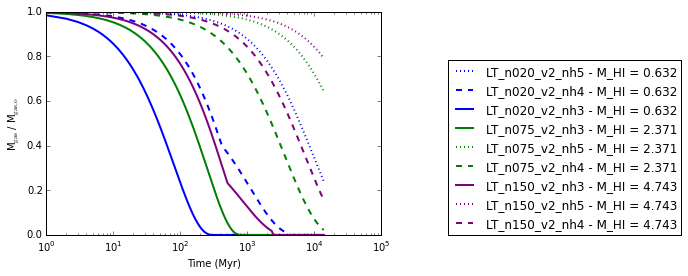

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

def get_line_style(name):
    if 'nh3' in name:
        ls = '-'
    elif 'nh4' in name:
        ls = '--'
    else:
        ls = ':'
        
    if 'n020' in name:
        color = 'blue'
    elif 'n075' in name:
        color = 'green'
    else:
        color = 'purple'
    
    return ls, color

for name in anal_models:
    
    ls,color = get_line_style(name)
    
    
    ax.plot(t/cgs.Myr, M_tot[name] / M_tot[name][0], label=name + ' - M_HI = %.3f'%(LT_dict[name].ic["M_HI"]/(1.0E5*cgs.Msun)), ls = ls, color = color, lw=2)
    
    
ax.set_ylim(0,1)
ax.semilogx()
ax.legend(loc=[1.2,0.0])
ax.set_ylabel(r'M$_{\rm{gas}}$ / M$_{\rm{gas,o}}$')
ax.set_xlabel(r'Time (Myr)')

#ax=fig.add_subplot(122)
#ax.legend(loc='best',fancybox=True)
#ax.set_aspect('equal','datalim')


In [64]:
sim = LT_dict['LT_n020_v2_nh3']
sim.FLASH_readable_ic()


sim_rho_crit       = 9.74000000E-30
sim_TCloud         = 6.00000000E+03
sim_rhoCenter      = 4.38226440E-25
sim_mu_halo        = 6.00000000E-01
sim_TAmbient       = 3.89304056E+04
sim_M200           = 6.15304636E+41
sim_bparam         = 2.45311368E+21
sim_rhoAmbient     = 1.00357200E-27
sim_mu_dwarf       = 1.31000000E+00


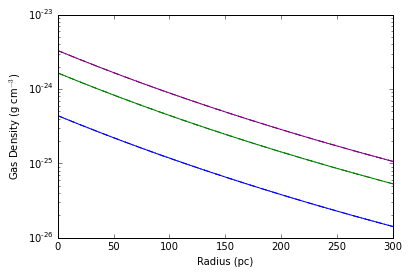

In [65]:
r = np.linspace(0.0,300.0*cgs.pc,300)

gas_density = {}
for name in LT_dict:
    gas_density[name] = LT_dict[name].find_density_profile(r)
    
for name in gas_density:
    ls,color = get_line_style(name)
    
    plt.plot(r/cgs.pc, gas_density[name], color=color, ls = ls)
    
plt.semilogy()
plt.xlabel(r'Radius (pc)')
plt.ylabel(r'Gas Density (g cm$^{-3}$)')

13.6915829962
13.6915829962
13.6915829962
13.6915829962
13.6915829962
13.6915829962
13.6915829962
13.6915829962
13.6915829962


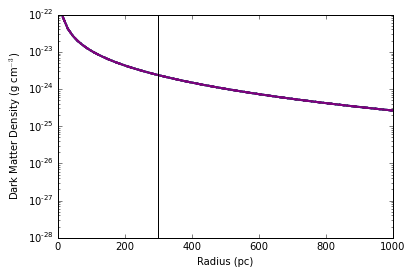

In [69]:
r = np.linspace(0.0,15*cgs.kpc,1000)

DM_density = {}
for name in LT_dict:
    DM_density[name] = LT_dict[name].DM_density(r)
plt.semilogy()

for name in gas_density:
    ls,color = get_line_style(name)
    
    plt.plot(r/cgs.pc, DM_density[name], color=color, ls = ls,lw=2)
    plt.plot([LT_dict[name].ic['R200']/cgs.pc]*2, plt.ylim(), color = color, ls = '-.',lw=2)
    print LT_dict[name].ic['R200']/cgs.kpc

plt.plot([LT_dict['LT_n020_v2_nh3'].ic['r_HI']/cgs.pc]*2,plt.ylim(),color='black',ls='-',label='HI radius')
plt.xlim(0.0,1000)
plt.xlabel(r'Radius (pc)')
plt.ylabel(r'Dark Matter Density (g cm$^{-3}$)')